In [80]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import copy
import glob
import random
from random import random as rd
import gc
from tqdm import tqdm
import matplotlib.pyplot as plt
import scipy.stats
from sklearn import preprocessing

In [91]:
# 表示形式
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(precision=5, floatmode='maxprec')
np.set_printoptions(suppress=True)

In [ ]:
df_train = pd.read_csv("../input/ventilator-pressure-prediction/train.csv")
unique_pressures = df_train["pressure"].unique()
sorted_pressures = np.sort(unique_pressures)
total_pressures_len = len(sorted_pressures)

In [128]:
def show_hist(dir_path):
    file_paths = glob.glob(f'{dir_path}/*')
    file_paths.sort()    
    pred = []
    for path in tqdm(file_paths):
        tmp_df = pd.read_csv(path)
        pred.append(tmp_df['pressure'].values)
        root, ext = os.path.splitext(path)
        basename = os.path.basename(root)
    pred = np.array(pred)
    spread = pred.max(axis=0) - pred.min(axis=0) 
    norm_spread = scipy.stats.zscore(spread, ddof=1)
    norm_spread += -norm_spread.min()
    
    plt.figure(figsize=(24,8))
    
    plt.subplot(1, 2, 1)
    plt.hist(spread, label='spread', bins=100, alpha=0.3)
    plt.hist(norm_spread, label='norm spread', bins=100, alpha=0.3)
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.hist(spread, label='spread', bins=100, range=(0, 1.5), alpha=0.3)
    plt.hist(norm_spread, label='norm spread', bins=100, range=(0, 1.5), alpha=0.3)
    plt.legend()
    
    plt.show()

In [134]:
def find_nearest(prediction):
    insert_idx = np.searchsorted(sorted_pressures, prediction)
    if insert_idx == total_pressures_len:
        return sorted_pressures[-1]
    elif insert_idx == 0:
        return sorted_pressures[0]
    lower_val = sorted_pressures[insert_idx - 1]
    upper_val = sorted_pressures[insert_idx]
    return lower_val if abs(lower_val - prediction) < abs(upper_val - prediction) else upper_val


def set_seed(seed = 42):
    np.random.seed(seed)
    random_state = np.random.RandomState(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    return random_state


def better_than_median(inputs, axis, spread_lim):
    """Compute the mean of the predictions if there are no outliers,
    or the median if there are outliers.
    Parameter: inputs = ndarray of shape (n_samples, n_folds)"""
    inputs = np.array(inputs)
    spread = inputs.max(axis=axis) - inputs.min(axis=axis) 
    spread_lim = spread_lim
    print(f"Inliers:  {(spread < spread_lim).sum():7} -> compute mean")
    print(f"Outliers: {(spread >= spread_lim).sum():7} -> compute median")
    print(f"Total:    {len(inputs):7}")
    return np.where(spread < spread_lim,
                    np.mean(inputs, axis=axis),
                    np.median(inputs, axis=axis))


def blend(dir_path, spread_lim=0.2):
    file_paths = glob.glob(f'{dir_path}/*')
    file_paths.sort()
    for path in file_paths:
        root, ext = os.path.splitext(path)
        basename = os.path.basename(root)
        print(basename)
    sub_df = pd.read_csv('../input/ventilator-pressure-prediction/sample_submission.csv')
    pred = []
    for path in tqdm(file_paths):
        tmp_df = pd.read_csv(path)
        #np.append(pred, tmp_df['pressure'].values, axis=0)
        pred.append(tmp_df['pressure'].values)
        root, ext = os.path.splitext(path)
        basename = os.path.basename(root)
    pred = better_than_median(pred, axis=0, spread_lim=spread_lim)
    sub_df['pressure'] = pred
    sub_df["pressure"] = sub_df["pressure"].apply(find_nearest)
    output_dir = './btm_submissions/'
    os.makedirs(output_dir, exist_ok=True)
    sub_df.to_csv(output_dir+f'btm_submission_{input_dir}_{spread_lim}.csv', index=False)

In [118]:
# dir_path = f'./submissions/{input_dir}'
# file_paths = glob.glob(f'{dir_path}/*')
# file_paths.sort()    
# pred = []
# for path in tqdm(file_paths):
#     tmp_df = pd.read_csv(path)
#     pred.append(tmp_df['pressure'].values)
#     root, ext = os.path.splitext(path)
#     basename = os.path.basename(root)
# pred = np.array(pred)
# spread = pred.max(axis=0) - pred.min(axis=0) 
# norm_spread = scipy.stats.zscore(spread, ddof=1)
# norm_spread += -norm_spread.min()

In [119]:
# for p in range(0, 101, 10):
#     print(p, "パーセンタイル・・・", np.percentile(spread, p))

In [147]:
input_dir='level5_1101_btm'

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:16<00:00,  1.30it/s]


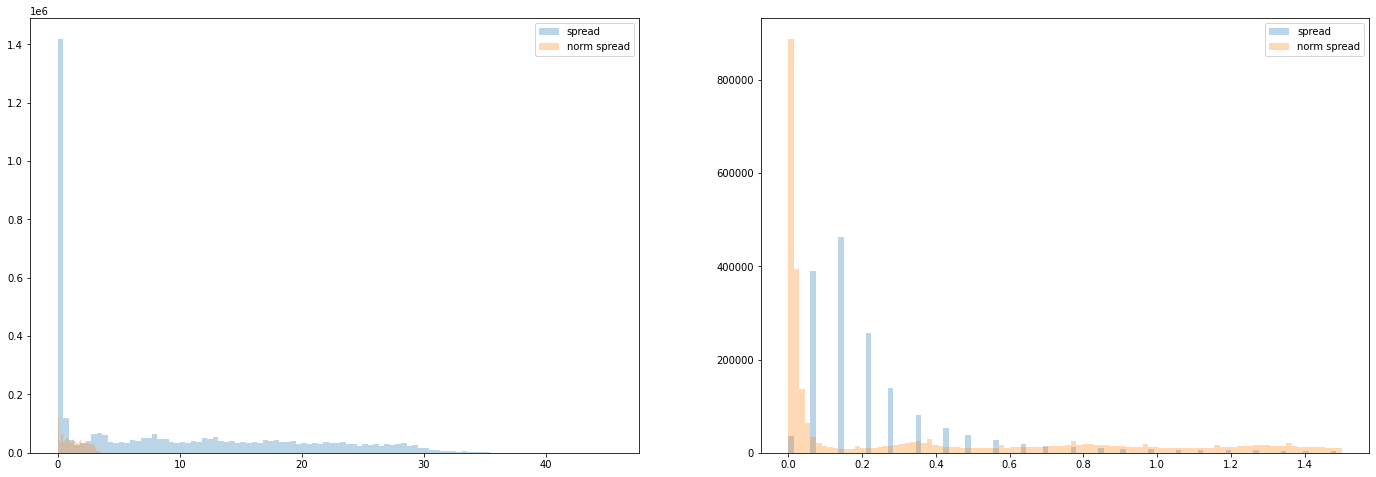

In [148]:
show_hist(f'./submissions/{input_dir}')

In [150]:
spread_lim = 0.3
blend(f'./submissions/{input_dir}', spread_lim)

0.1393_DNN-LSTM - (TPU)_median_submission
0.139_Pulp _iction_median_submission
0.140_Gaps_Features_submission
0.1413_VPP- A Basic Ensembling Technique with RidgeCV_submission_pp
0.1413_median_submission_1024_tf_ver1
0.1430_median_submission_PF_ver1
0.1437_median_submission_1025_tf_ver1_pca10_500ep
0.1439_median_submission_1027_tf_ver1_pca10-ver2
0.144_median_submission_GB_VPP_Whoppity_dub_dub
0.1452_median_submission_1024_tf_ver2_batch256
btm_submission_level1_1026_0.12
btm_submission_level2_1031_0.1
btm_submission_level3_1101_0.12
btm_submission_level4_1101_0.12
median_submission_1025_tf_ver1_pca5_500ep
median_submission_1026_tf_ver1_CosineDecayRestarts_fds40_500ep
median_submission_1026_tf_ver3
median_submission_1027_tf_ver4
median_submission_1027_tf_ver5
median_submission_1031_tf_ver6
median_submission_1031_tf_ver7


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:16<00:00,  1.30it/s]


Inliers:  1283553 -> compute mean
Outliers: 2740447 -> compute median
Total:         21
